# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [97]:
# Para funcionar no jupyter temos que configurar a plotagem inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Configurar o tamanho das figuras que vão ser gerada
plt.rc('figure', figsize = (30, 10))

In [98]:
dados = pd.read_csv('../dados/aluguel_residencial.csv', sep=';')

In [99]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


<img src='../box-plot.png' width=700/>

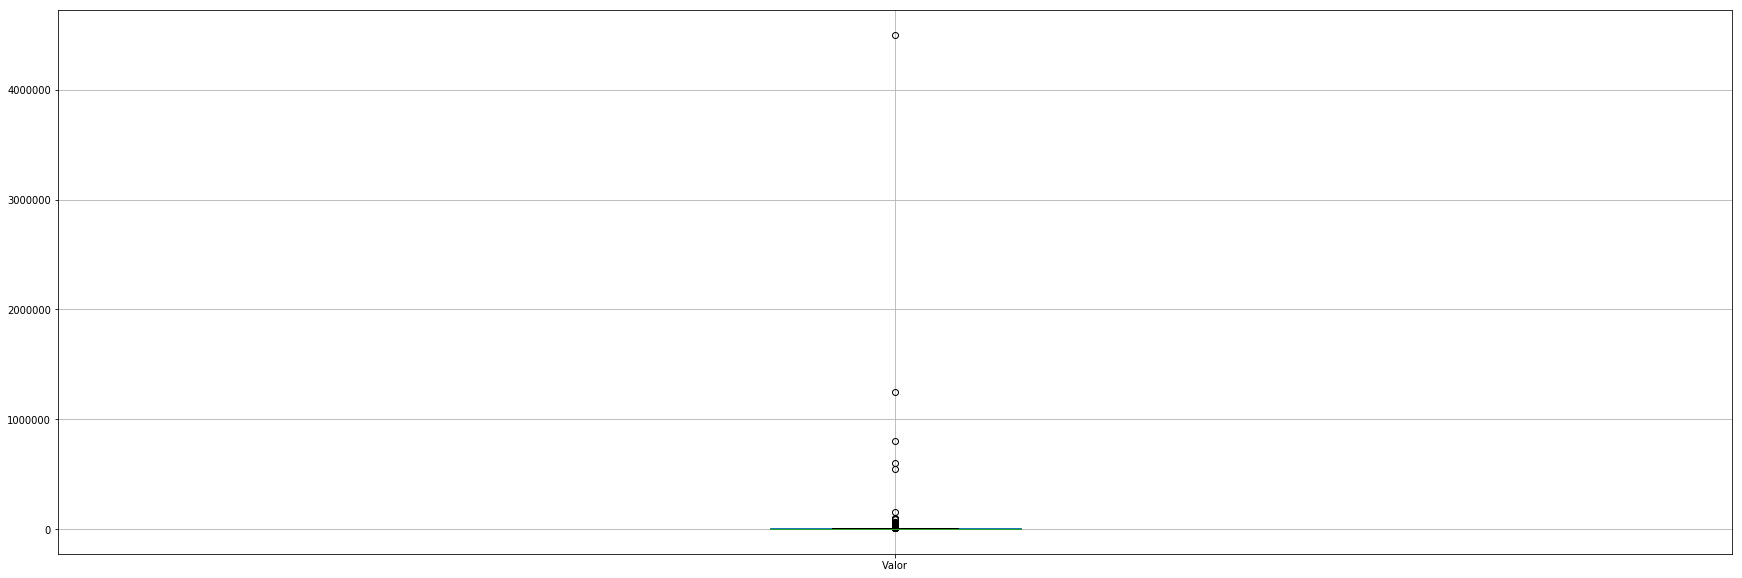

In [100]:
# O Grafico Box Plot, é um grafico utilizado para visualizar outliers em nossos dados, ou seja vamos conseguir
# analisar os dados discrepantes que atrapalham as medias e aumentam o desvio padrão
dados.boxplot(['Valor'])

In [101]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [102]:
# Criando uma Series com os valores
valor = dados['Valor']

<img src='../box-plot.png' width=700/>

In [103]:
# Estatistica para remover os Outliers. Com ela conseguimos saber o limite para o valor minimo e maximo de acordo
# com todo os dados
# Vamos dividir os dados de valor em quantils, 25% (.25)
Q1 = valor.quantile(.25)
# E o quartil 3 que é 75% (.75)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [104]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

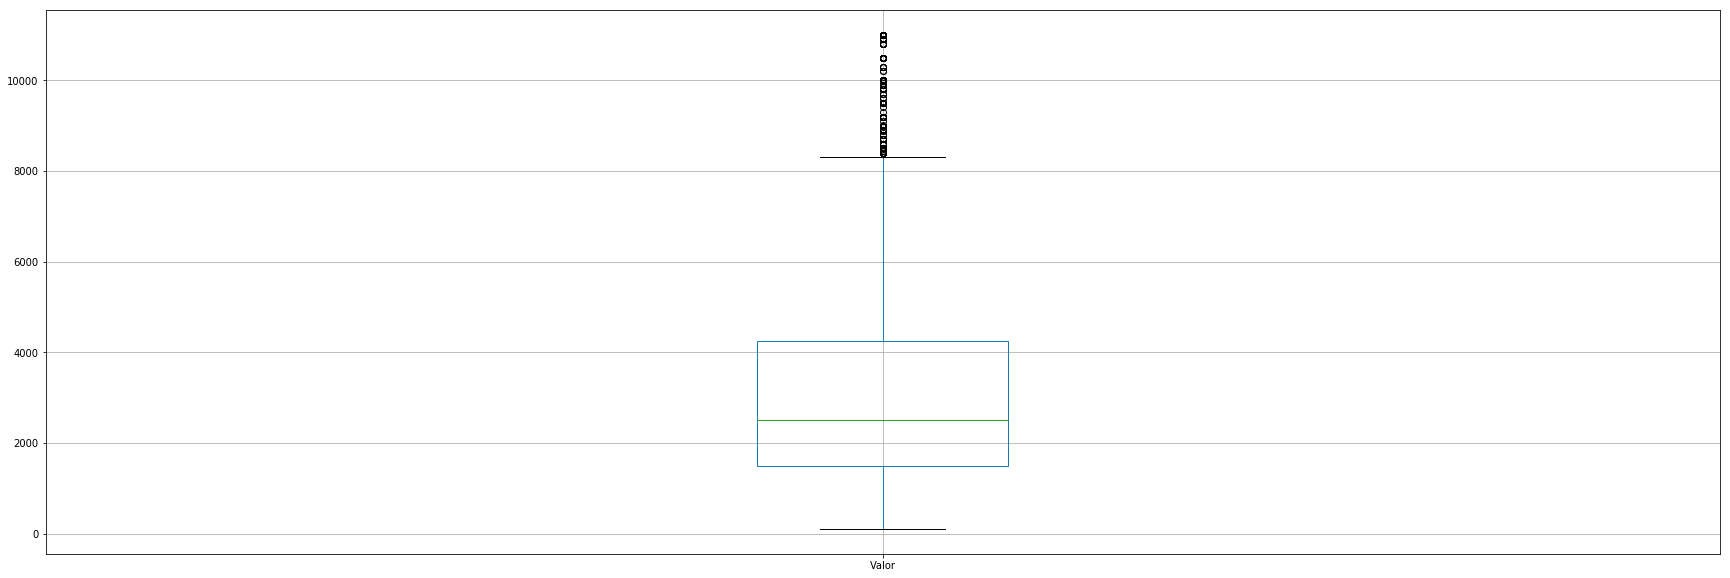

In [105]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e51592e10>]],
      dtype=object)

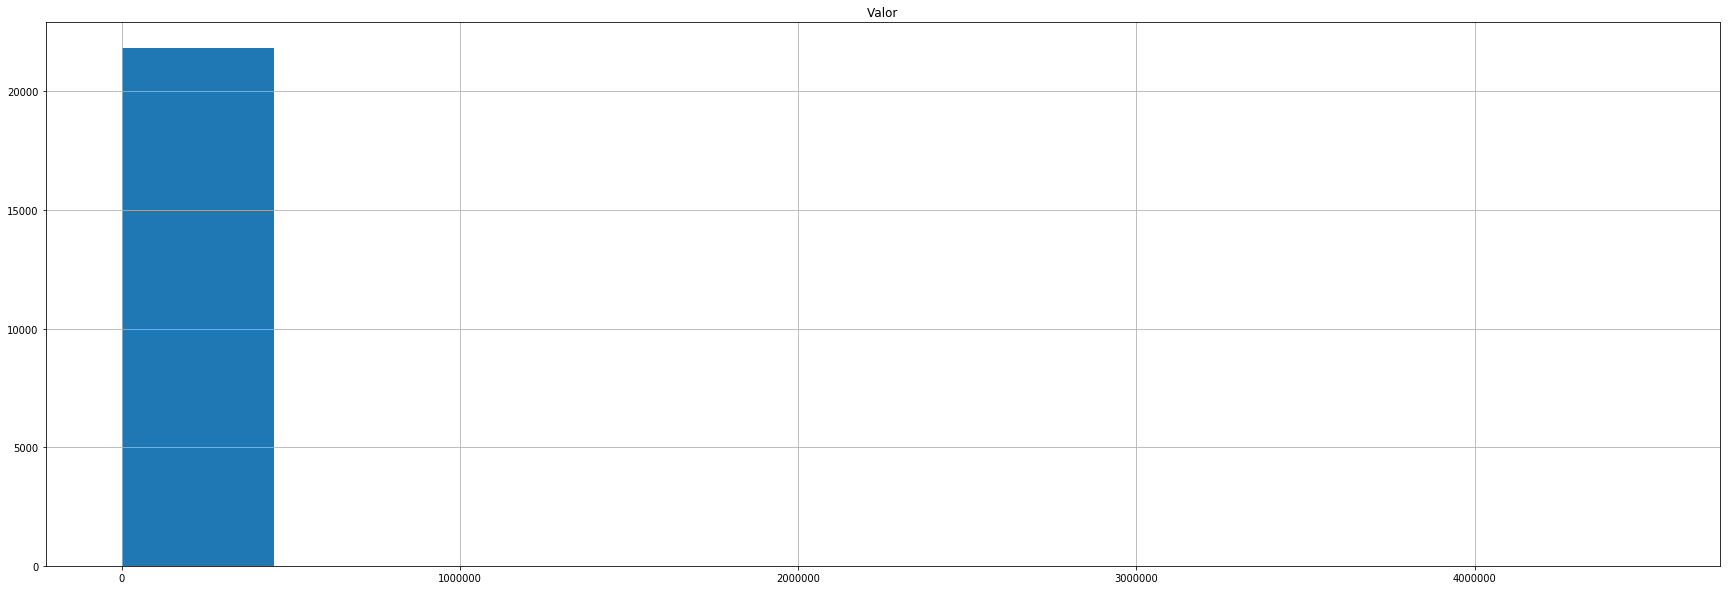

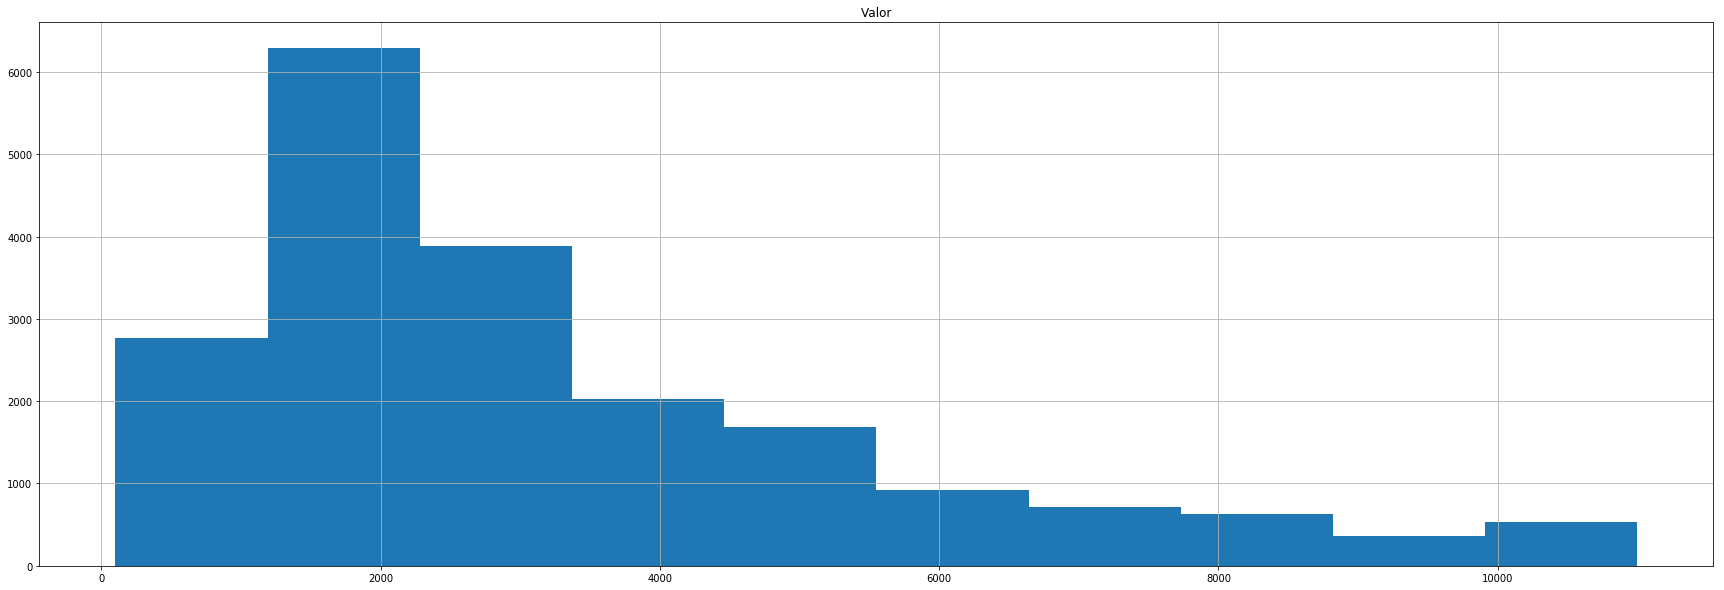

In [106]:
# Histograma para analisarmos as frequencia de alugueis de antes de remover os outliers e depois de remover
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Atividades

In [107]:
import pandas as pd

In [108]:
dados_atv = pd.read_csv('../dados/aluguel_amostra.csv', sep=';')

In [109]:
dados_atv.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


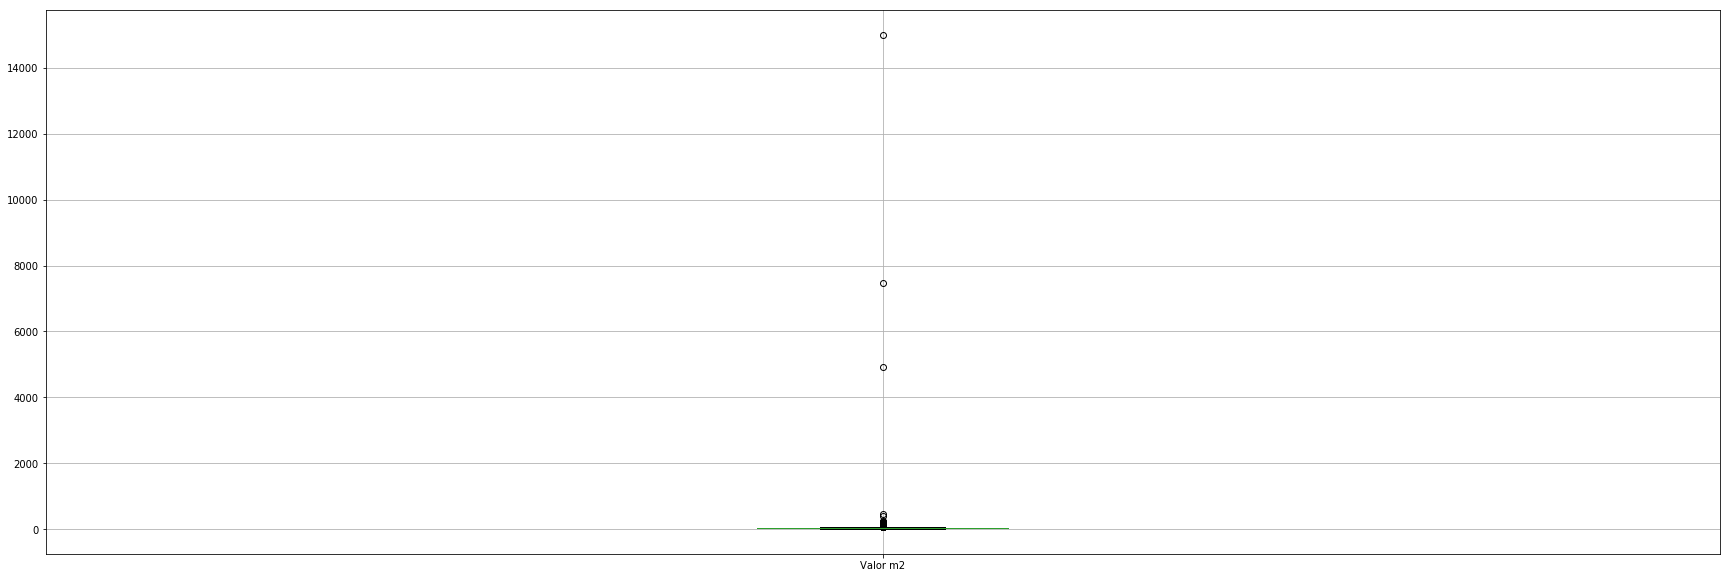

In [110]:
dados_atv.boxplot(['Valor m2'])

<img src='../box-plot.png' width=700/>

In [111]:
valor_m2 = dados_atv['Valor m2']

In [112]:
# Estatistica para remover os Outliers. Com ela conseguimos saber o limite para o valor minimo e maximo de acordo
# com todo os dados

Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [113]:
print(f'Q1: {Q1}, Q3: {Q3}, IIQ: {IIQ}, Limite Inferior: {limite_inferior}, Limite Superior: {limite_superior}')

Q1: 21.25, Q3: 42.31, IIQ: 21.060000000000002, Limite Inferior: -10.340000000000003, Limite Superior: 73.9


## Identificando e Removendo Outliers (continuação)

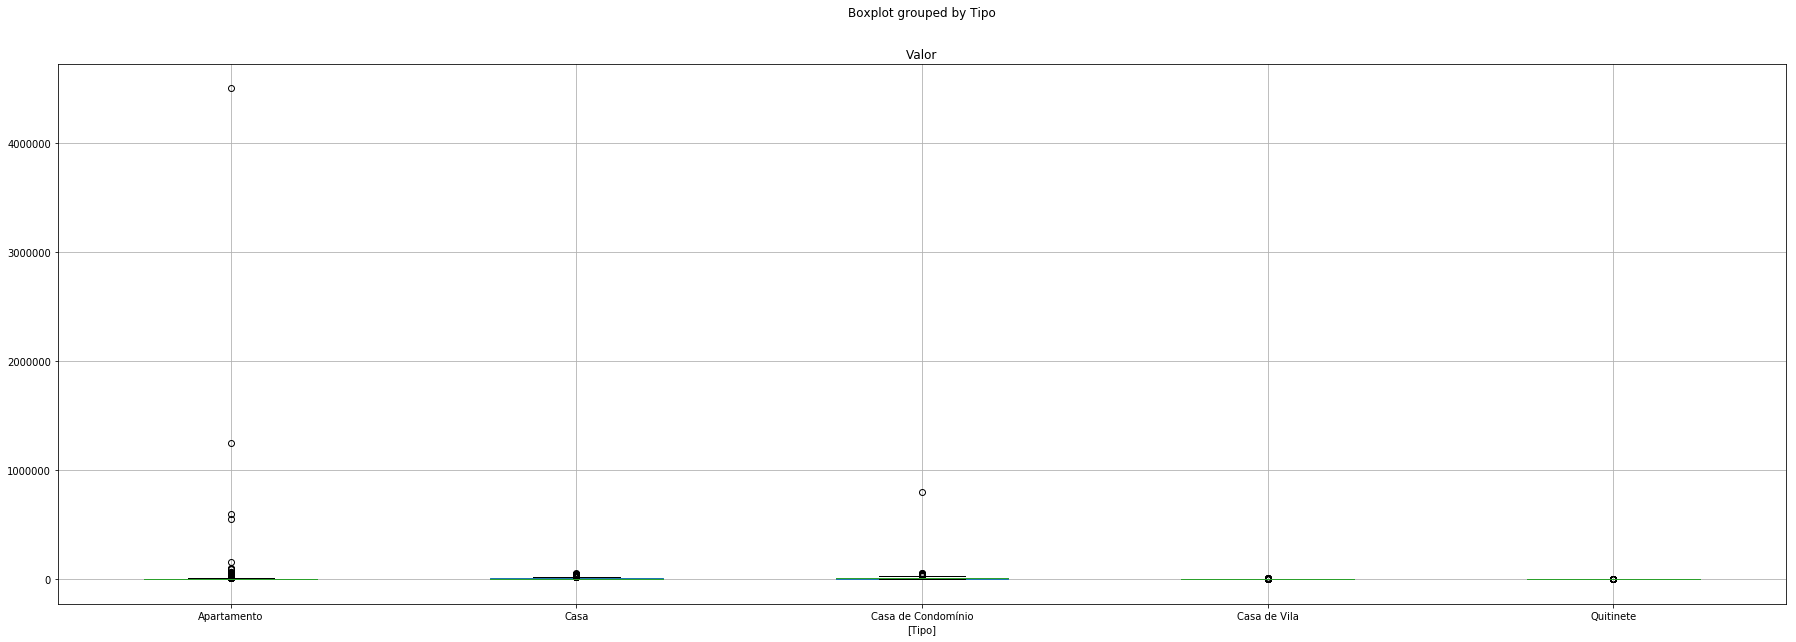

In [114]:
# Plotando boxplot do Valor por Tipo
dados.boxplot(['Valor'], by=['Tipo'])

In [118]:
# Analisando o boxplot acima, podemos ver a necessidade de separar os dados para realizar a analise por tipo, 
# porque, podemos ter casas de auto padrão com o aluguel de 30 mil e vamos perder informações por exemplo com base
# nos quitinete, porque nos esperamos um quitinete por 30 mil

# Então, vamos criar um agrupamento com base na variavel Tipo e com os dados de Valor
grupo_tipo = dados.groupby('Tipo')['Valor']

In [121]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [125]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [126]:
# Quando temos um DataFrameGroupBy e aplicamos o calculo de quartils, ele nos retorna Series com a estatistica de cada
# item do grupo

# Estatistica para remover os Outliers. Com ela conseguimos saber o limite para o valor minimo e maximo de acordo
# com todo os dados
# Vamos dividir os dados de valor em quantils, 25% (.25)
Q1 = grupo_tipo.quantile(.25)
# E o quartil 3 que é 75% (.75)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [129]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [130]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [131]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [132]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [134]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [135]:
# Selecionando um valor de uma Series
limite_superior['Apartamento']

9950.0

<img src='../box-plot.png' width=700/>

In [140]:
# Realizar um for para capturar cada chave do agrupamento
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    print(f'Iterando por: {tipo}')
#     Criando as restrições para realizar a seleção por tipo e valor onde o seja maior ou igual ao limite_inferior
#     e menor ou igual a limite_superior
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
#     Criar um DataFrame de acordo com a seleção
    dados_selecao = dados[selecao]
#     Concatenar os DataFrame um em baixo do outro no dados_new
    dados_new = pd.concat([dados_new, dados_selecao])

Iterando por: Apartamento
Iterando por: Casa
Iterando por: Casa de Condomínio
Iterando por: Casa de Vila
Iterando por: Quitinete


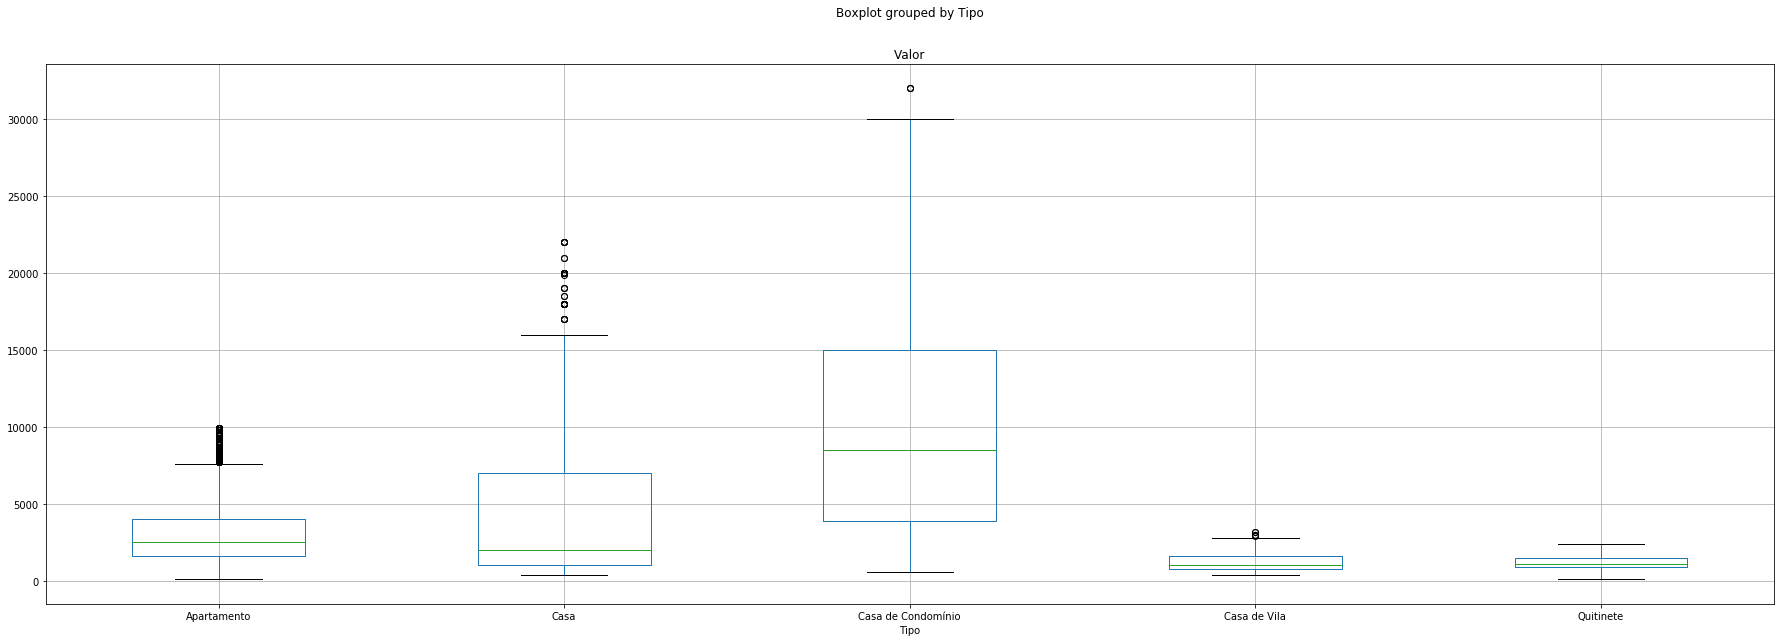

In [142]:
# Analisando esse boxplot com o anterior, podemos ver que o boxplot ficou bem mais limpo porque esta realizando a 
# remoção dos outliers por cada tipo, onde cada tipo tem um padrão de valor maior ou menor
dados_new.boxplot('Valor', by='Tipo')

In [143]:
# Exportando o DataFrame pré-processado sem os outliers
dados_new.to_csv('../dados/aluguel_residencial_sem_outliers.csv')